<a href="https://colab.research.google.com/github/Syed-Waleed-Shah/BootstrapDashboardUI/blob/master/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Applying the feature engineering methods and preparing the data of "subsetHousePrice.csv" for machine learning modeling.

##Syed Waleed 8996

##1) Importing required libraries and dataset

In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving subsetHousePrice.csv to subsetHousePrice.csv


In [165]:
import io
df = pd.read_csv(io.BytesIO(uploaded['subsetHousePrice.csv']))
df.head()

,Unnamed: 0,Id,MSSubClass,LotFrontage,LotArea,Street,LotShape,Utilities,Neighborhood,Condition1,RoofStyle,KitchenQual,RoofMatl,Fireplaces,FireplaceQu,1stFlrSF,2ndFlrSF,SalePrice
0,0,1,60,65.0,8450,Pave,Reg,AllPub,CollgCr,Norm,Gable,Gd,CompShg,0,NaN,856,854,208500
1,1,2,20,80.0,9600,Pave,Reg,AllPub,Veenker,Feedr,Gable,TA,CompShg,1,TA,1262,0,181500
2,2,3,60,68.0,11250,Pave,IR1,AllPub,CollgCr,Norm,Gable,Gd,CompShg,1,TA,920,866,223500
3,3,4,70,60.0,9550,Pave,IR1,AllPub,Crawfor,Norm,Gable,Gd,CompShg,1,Gd,961,756,140000
4,4,5,60,84.0,14260,Pave,IR1,AllPub,NoRidge,Norm,Gable,Gd,CompShg,1,TA,1145,1053,250000


## 2) Removing following two features because theses features will not be helpful during ML modeling
1) Unnamed:0
 
2) Id

In [166]:
df.drop(["Unnamed: 0" ,"Id"], axis=1, inplace=True)

The resultant dataframe below shows that both non required features are removed sucessfully

In [167]:
df.head()

,MSSubClass,LotFrontage,LotArea,Street,LotShape,Utilities,Neighborhood,Condition1,RoofStyle,KitchenQual,RoofMatl,Fireplaces,FireplaceQu,1stFlrSF,2ndFlrSF,SalePrice
0,60,65.0,8450,Pave,Reg,AllPub,CollgCr,Norm,Gable,Gd,CompShg,0,NaN,856,854,208500
1,20,80.0,9600,Pave,Reg,AllPub,Veenker,Feedr,Gable,TA,CompShg,1,TA,1262,0,181500
2,60,68.0,11250,Pave,IR1,AllPub,CollgCr,Norm,Gable,Gd,CompShg,1,TA,920,866,223500
3,70,60.0,9550,Pave,IR1,AllPub,Crawfor,Norm,Gable,Gd,CompShg,1,Gd,961,756,140000
4,60,84.0,14260,Pave,IR1,AllPub,NoRidge,Norm,Gable,Gd,CompShg,1,TA,1145,1053,250000


## 3) Analyzing the features of our dataset using info() function to figure out some important information
The result below shows that there are 3 data types float64(1), int64(6) and object(9). And there are total 16 features out of which two features {LotFrontage and FirePlaceQu} have null values in them.

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1460 non-null   int64  
 1   LotFrontage   1201 non-null   float64
 2   LotArea       1460 non-null   int64  
 3   Street        1460 non-null   object 
 4   LotShape      1460 non-null   object 
 5   Utilities     1460 non-null   object 
 6   Neighborhood  1460 non-null   object 
 7   Condition1    1460 non-null   object 
 8   RoofStyle     1460 non-null   object 
 9   KitchenQual   1460 non-null   object 
 10  RoofMatl      1460 non-null   object 
 11  Fireplaces    1460 non-null   int64  
 12  FireplaceQu   770 non-null    object 
 13  1stFlrSF      1460 non-null   int64  
 14  2ndFlrSF      1460 non-null   int64  
 15  SalePrice     1460 non-null   int64  
dtypes: float64(1), int64(6), object(9)
memory usage: 182.6+ KB


## 4) Analyzing and working on features having null values.

### 4.1) First of all finding the features having null values. We will find total number of null values and percentage of null values through following code.
Following output shows total and percentage of Nan values in the features. It seems that {FirePlaceQu} has too many Nan values. But we will try to remove these Nan values through some techniques.

In [169]:
for feature in df:
   totalNaN = df[feature].isna().sum()
   if totalNaN > 0:
      print(feature) 
      print("Total NaN :", totalNaN)
      totalRows = len(df[feature])
      print("Percentage :", round(( totalNaN / totalRows) * 100, 1))

LotFrontage
Total NaN : 259
Percentage : 17.7
FireplaceQu
Total NaN : 690
Percentage : 47.3


### 4.2) Analyzing the feature LotFrontage to remove Nan values

4.2.1) Visualizing the data on graph

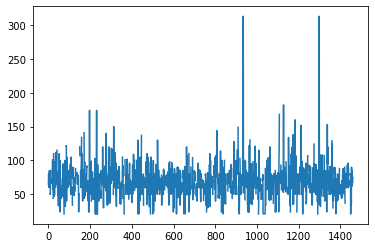

In [170]:
plt.plot(df.LotFrontage)

 The graph above shows that there are only 2 values which are quiet larger than others. Now we will fill these values by nan to lover the deviation and use the forward fill method to fill the Nan values to get better results

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


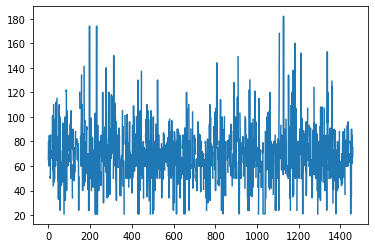

In [171]:
for i in range(len(df.LotFrontage)):
   if df.LotFrontage[i] > 200:
      df.LotFrontage[i] = np.NaN
plt.plot(df.LotFrontage)

In [172]:
df.LotFrontage.fillna(method="ffill" , inplace=True)
df.LotFrontage.isna().unique()

array([False])

 
###4.2) Dropping the feature FireplaceQu because it has 47.3 % Nan values which are quiet large

In [173]:
df.drop("FireplaceQu", axis=1, inplace=True)

In [174]:
df.head()

,MSSubClass,LotFrontage,LotArea,Street,LotShape,Utilities,Neighborhood,Condition1,RoofStyle,KitchenQual,RoofMatl,Fireplaces,1stFlrSF,2ndFlrSF,SalePrice
0,60,65.0,8450,Pave,Reg,AllPub,CollgCr,Norm,Gable,Gd,CompShg,0,856,854,208500
1,20,80.0,9600,Pave,Reg,AllPub,Veenker,Feedr,Gable,TA,CompShg,1,1262,0,181500
2,60,68.0,11250,Pave,IR1,AllPub,CollgCr,Norm,Gable,Gd,CompShg,1,920,866,223500
3,70,60.0,9550,Pave,IR1,AllPub,Crawfor,Norm,Gable,Gd,CompShg,1,961,756,140000
4,60,84.0,14260,Pave,IR1,AllPub,NoRidge,Norm,Gable,Gd,CompShg,1,1145,1053,250000


### 4.3) Now we got rid of all null values as we can see below

In [175]:
df.isna().sum()

MSSubClass      0
LotFrontage     0
LotArea         0
Street          0
LotShape        0
Utilities       0
Neighborhood    0
Condition1      0
RoofStyle       0
KitchenQual     0
RoofMatl        0
Fireplaces      0
1stFlrSF        0
2ndFlrSF        0
SalePrice       0
dtype: int64

## 5) Its time to analyze features of type object. 
We will do some feature enginnering techniques to convert object types to numerical type or split the feature into multiple features or drop those features which we will find outliers

### 5.1) Getting total number of unique values in all object type features
The output below shows that all the other features has less number of unique values but Neighborhood has too many number of unique values in it.

In [176]:
 
serial = 1
for feature in df:
   if df[feature].dtype == object:
     print(str(serial) +")", feature, "has", len(df[feature].unique()), "unique values")
     serial += 1

1) Street has 2 unique values
2) LotShape has 4 unique values
3) Utilities has 2 unique values
4) Neighborhood has 25 unique values
5) Condition1 has 9 unique values
6) RoofStyle has 6 unique values
7) KitchenQual has 4 unique values
8) RoofMatl has 8 unique values


### 5.2) Applying dummy encoding on Street, LotShape, Utilities, RoofStyle and KitchenQual features

In [177]:
 
pdTest = pd.get_dummies(df,columns=["Street"], drop_first = 
True, prefix = "S")
pdTest = pd.get_dummies(pdTest,columns=["LotShape"], drop_first = 
True, prefix = "L")
pdTest = pd.get_dummies(pdTest,columns=["Utilities"], drop_first = 
True, prefix = "U")
pdTest = pd.get_dummies(pdTest,columns=["RoofStyle"], drop_first = 
True, prefix = "R")
pdTest = pd.get_dummies(pdTest,columns=["KitchenQual"], drop_first = 
True, prefix = "K")
pdTest

,MSSubClass,LotFrontage,LotArea,Neighborhood,Condition1,RoofMatl,Fireplaces,1stFlrSF,2ndFlrSF,SalePrice,S_Pave,L_IR2,L_IR3,L_Reg,U_NoSeWa,R_Gable,R_Gambrel,R_Hip,R_Mansard,R_Shed,K_Fa,K_Gd,K_TA
0,60,65.0,8450,CollgCr,Norm,CompShg,0,856,854,208500,1,0,0,1,0,1,0,0,0,0,0,1,0
1,20,80.0,9600,Veenker,Feedr,CompShg,1,1262,0,181500,1,0,0,1,0,1,0,0,0,0,0,0,1
2,60,68.0,11250,CollgCr,Norm,CompShg,1,920,866,223500,1,0,0,0,0,1,0,0,0,0,0,1,0
3,70,60.0,9550,Crawfor,Norm,CompShg,1,961,756,140000,1,0,0,0,0,1,0,0,0,0,0,1,0
4,60,84.0,14260,NoRidge,Norm,CompShg,1,1145,1053,250000,1,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,Gilbert,Norm,CompShg,1,953,694,175000,1,0,0,1,0,1,0,0,0,0,0,0,1
1456,20,85.0,13175,NWAmes,Norm,CompShg,2,2073,0,210000,1,0,0,1,0,1,0,0,0,0,0,0,1
1457,70,66.0,9042,Crawfor,Norm,CompShg,2,1188,1152,266500,1,0,0,1,0,1,0,0,0,0,0,1,0
1458,20,68.0,9717,NAmes,Norm,CompShg,0,1078,0,142125,1,0,0,1,0,0,0,1,0,0,0,1,0


### 5.3) Applying the replacement technique on Neighborhood, Condition1 and RoofMatl features to replace the string type values to numeric types

In [178]:
 
features = ["Neighborhood", "Condition1" 
, "RoofMatl"]
for feature in features:
   old = list(pdTest[feature].unique())
   new = list(range(len(pdTest[feature].unique())))
   pdTest.replace(old, new, inplace=True)

## 6) The following info shows that now there is no feature having NaN value and all the features are of numeric type therefore our dataset is ready for modeling.

In [179]:
pdTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1460 non-null   int64  
 1   LotFrontage   1460 non-null   float64
 2   LotArea       1460 non-null   int64  
 3   Neighborhood  1460 non-null   int64  
 4   Condition1    1460 non-null   int64  
 5   RoofMatl      1460 non-null   int64  
 6   Fireplaces    1460 non-null   int64  
 7   1stFlrSF      1460 non-null   int64  
 8   2ndFlrSF      1460 non-null   int64  
 9   SalePrice     1460 non-null   int64  
 10  S_Pave        1460 non-null   uint8  
 11  L_IR2         1460 non-null   uint8  
 12  L_IR3         1460 non-null   uint8  
 13  L_Reg         1460 non-null   uint8  
 14  U_NoSeWa      1460 non-null   uint8  
 15  R_Gable       1460 non-null   uint8  
 16  R_Gambrel     1460 non-null   uint8  
 17  R_Hip         1460 non-null   uint8  
 18  R_Mansard     1460 non-null 

## 7) Storing the dataframe in final variable and file

In [180]:
dfFinal = pdTest
dfFinal.to_csv("HousePriceCleaned.csv")